# 📊 Comprehensive EDA: Top 50 Cryptocurrencies Market Analysis

## Complete Exploratory Data Analysis with Visualizations

This notebook provides an in-depth exploratory data analysis of the Top 50 Cryptocurrencies Historical Market Data dataset, covering:

- ✅ **Data Loading & Quality Assessment** - Automated data loading with Kaggle/local path detection
- 📈 **Statistical Analysis** - Comprehensive statistics and distributions
- ⏰ **Time Series Analysis** - Price trends, patterns, and historical performance
- 📉 **Volatility Analysis** - Risk metrics, Sharpe ratios, and return distributions
- 🔗 **Correlation Analysis** - Inter-cryptocurrency relationships and market dynamics
- 💹 **Volume Analysis** - Trading volume trends and patterns
- 📊 **Performance Metrics** - Returns, drawdowns, and market capitalization insights
- 🎯 **Time-Based Patterns** - Day-of-week and monthly return patterns
- 📉 **Price-Volume Relationships** - Market liquidity and trading dynamics

### 📌 **Kaggle Compatible**
This notebook automatically detects if it's running on Kaggle and uses the appropriate dataset path:
- **Kaggle**: `/kaggle/input/top-50-cryptocurrency-dataset`
- **Local**: `../Dataset`

**Note:** Make sure to add the dataset to your Kaggle notebook before running!

---

**Keywords:** Cryptocurrency, Bitcoin, Ethereum, EDA, Exploratory Data Analysis, Market Analysis, Time Series, Volatility, Correlation, Financial Analysis


In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
from datetime import datetime
import glob

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")


Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.0.2


## 1. Data Loading and Initial Exploration


In [24]:
# Define paths - Auto-detect Kaggle environment
import os

# Check if running on Kaggle
if os.path.exists('/kaggle/input'):
    # Kaggle environment - try different possible paths
    kaggle_base = Path('/kaggle/input/top-50-cryptocurrency-dataset')
    
    # Check if CSV files are directly in the dataset folder or in a subfolder
    if kaggle_base.exists():
        # Check if CSV files are directly here
        csv_files_direct = list(kaggle_base.glob('*.csv'))
        if len(csv_files_direct) > 0:
            base_path = kaggle_base
            print("🔵 Running on Kaggle - CSV files found directly in dataset folder")
        else:
            # Check for Dataset subfolder
            dataset_subfolder = kaggle_base / 'Dataset'
            if dataset_subfolder.exists():
                base_path = dataset_subfolder
                print("🔵 Running on Kaggle - CSV files found in Dataset subfolder")
            else:
                base_path = kaggle_base
                print("🔵 Running on Kaggle - Using base dataset path")
    else:
        # Try to find the dataset folder
        kaggle_input = Path('/kaggle/input')
        available_datasets = [d for d in kaggle_input.iterdir() if d.is_dir()]
        if available_datasets:
            print(f"⚠️  Dataset folder not found at expected path.")
            print(f"Available datasets in /kaggle/input:")
            for ds in available_datasets:
                print(f"  - {ds.name}")
            # Use first available dataset as fallback
            base_path = available_datasets[0]
            print(f"Using: {base_path}")
        else:
            base_path = kaggle_base
            print("⚠️  Using default Kaggle path (may need adjustment)")
else:
    # Local environment
    base_path = Path('../Dataset')
    print("🟢 Running locally - Using local dataset path")

notebook_path = Path('.')

# Verify path exists and find CSV files
if not base_path.exists():
    print(f"❌ Error: Path {base_path} does not exist!")
else:
    print(f"✅ Dataset path: {base_path}")

# Get all CSV files (search recursively if needed)
csv_files = list(base_path.glob('*.csv'))
if len(csv_files) == 0:
    # Try recursive search
    csv_files = list(base_path.rglob('*.csv'))
    if len(csv_files) > 0:
        print(f"📁 Found CSV files in subdirectories")

print(f"\n📊 Total number of cryptocurrency files: {len(csv_files)}")
if len(csv_files) > 0:
    print(f"\nFirst 10 files:")
    for i, file in enumerate(csv_files[:10], 1):
        print(f"{i}. {file.name}")
    if len(csv_files) > 10:
        print(f"... and {len(csv_files) - 10} more files")
else:
    print("⚠️  No CSV files found! Please check the dataset path.")
    if os.path.exists('/kaggle/input'):
        print("\nTroubleshooting:")
        print("1. Make sure the dataset is added to your Kaggle notebook")
        print("2. Check the exact dataset name in /kaggle/input/")
        print("3. Verify CSV files are in the dataset folder")


🟢 Running locally - Using local dataset path
✅ Dataset path: ../Dataset

📊 Total number of cryptocurrency files: 49

First 10 files:
1. immutable.csv
2. chainlink.csv
3. render.csv
4. hedera.csv
5. kaspa.csv
6. sui.csv
7. xrp.csv
8. near.csv
9. the_graph.csv
10. flow.csv
... and 39 more files


In [25]:
# Function to load and clean cryptocurrency data
def load_crypto_data(file_path):
    """
    Load cryptocurrency CSV file and handle the header issue.
    The CSV files have a second row with ticker symbols that needs to be skipped.
    """
    try:
        # Read CSV, skipping the second row (index 1) which contains ticker symbols
        df = pd.read_csv(file_path, skiprows=[1])
        
        # Extract cryptocurrency name from filename
        crypto_name = file_path.stem.replace('_', ' ').title()
        
        # Convert Date column to datetime
        df['Date'] = pd.to_datetime(df['Date'])
        
        # Ensure numeric columns are numeric
        numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
        for col in numeric_cols:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        
        # Sort by date
        df = df.sort_values('Date').reset_index(drop=True)
        
        # Add cryptocurrency name column
        df['Cryptocurrency'] = crypto_name
        
        return df, crypto_name
    except Exception as e:
        print(f"Error loading {file_path.name}: {str(e)}")
        return None, None

# Test loading one file
test_file = csv_files[0]
test_df, test_name = load_crypto_data(test_file)
print(f"Test loading: {test_name}")
print(f"Shape: {test_df.shape}")
print(f"\nFirst few rows:")
print(test_df.head())
print(f"\nData types:")
print(test_df.dtypes)
print(f"\nBasic statistics:")
print(test_df.describe())


Test loading: Immutable
Shape: (1522, 7)

First few rows:
        Date  Close  High  Low  Open     Volume Cryptocurrency
0 2021-11-06   3.72  5.85 3.60  5.24   90510166      Immutable
1 2021-11-07   3.56  4.11 3.52  3.72   31382759      Immutable
2 2021-11-08   3.16  3.66 3.05  3.55   41090155      Immutable
3 2021-11-09   3.75  4.10 3.16  3.16  105361527      Immutable
4 2021-11-10   5.26  5.26 3.44  3.74  165847382      Immutable

Data types:
Date              datetime64[ns]
Close                    float64
High                     float64
Low                      float64
Open                     float64
Volume                     int64
Cryptocurrency            object
dtype: object

Basic statistics:
                                Date   Close    High     Low    Open  \
count                           1522 1522.00 1522.00 1522.00 1522.00   
mean   2023-12-06 11:59:59.999999744    1.35    1.42    1.28    1.35   
min              2021-11-06 00:00:00    0.22    0.23    0.21    0.22   

In [26]:
# Load all cryptocurrency data
crypto_data = {}
failed_files = []

print("Loading all cryptocurrency data...")
for file_path in csv_files:
    df, name = load_crypto_data(file_path)
    if df is not None:
        crypto_data[name] = df
    else:
        failed_files.append(file_path.name)

print(f"\nSuccessfully loaded: {len(crypto_data)} cryptocurrencies")
if failed_files:
    print(f"Failed to load: {len(failed_files)} files")
    print(f"Failed files: {failed_files}")

# Create a combined dataframe
all_data = pd.concat(crypto_data.values(), ignore_index=True)
print(f"\nCombined dataset shape: {all_data.shape}")
print(f"Date range: {all_data['Date'].min()} to {all_data['Date'].max()}")
print(f"\nCryptocurrencies in dataset:")
print(sorted(crypto_data.keys()))


Loading all cryptocurrency data...

Successfully loaded: 49 cryptocurrencies

Combined dataset shape: (112006, 7)
Date range: 2014-09-17 00:00:00 to 2026-01-05 00:00:00

Cryptocurrencies in dataset:
['Aave', 'Algorand', 'Aptos', 'Arbitrum', 'Avalanche', 'Axie Infinity', 'Binance Coin', 'Bitcoin', 'Bitcoin Cash', 'Cardano', 'Chainlink', 'Cosmos', 'Decentraland', 'Dogecoin', 'Eos', 'Ethereum', 'Fantom', 'Filecoin', 'Flow', 'Hedera', 'Immutable', 'Injective', 'Internet Computer', 'Kaspa', 'Lido', 'Litecoin', 'Maker', 'Near', 'Optimism', 'Pepe', 'Polkadot', 'Polygon', 'Render', 'Sandbox', 'Shiba Inu', 'Solana', 'Stacks', 'Stellar', 'Sui', 'Tether', 'Tezos', 'The Graph', 'Theta', 'Toncoin', 'Tron', 'Uniswap', 'Usd Coin', 'Vechain', 'Xrp']


## 2. Data Quality Assessment


In [27]:
# Check for missing values
print("Missing values per column:")
print(all_data.isnull().sum())
print(f"\nTotal missing values: {all_data.isnull().sum().sum()}")
print(f"Percentage of missing values: {(all_data.isnull().sum().sum() / len(all_data) * 100):.2f}%")

# Check for duplicates
print(f"\nDuplicate rows: {all_data.duplicated().sum()}")

# Check for zero or negative prices
print(f"\nRows with zero or negative Close prices: {(all_data['Close'] <= 0).sum()}")
print(f"Rows with zero or negative Volume: {(all_data['Volume'] <= 0).sum()}")

# Check data ranges
print(f"\nPrice ranges:")
print(f"Min Close: ${all_data['Close'].min():.2f}")
print(f"Max Close: ${all_data['Close'].max():.2f}")
print(f"Min Volume: {all_data['Volume'].min():,.0f}")
print(f"Max Volume: {all_data['Volume'].max():,.0f}")


Missing values per column:
Date                0
Close               0
High              230
Low               230
Open              230
Volume              0
Cryptocurrency      0
dtype: int64

Total missing values: 690
Percentage of missing values: 0.62%

Duplicate rows: 0

Rows with zero or negative Close prices: 230
Rows with zero or negative Volume: 335

Price ranges:
Min Close: $0.00
Max Close: $124752.53
Min Volume: 0
Max Volume: 83,252,070,566,791


In [28]:
# Data quality per cryptocurrency
quality_report = []

for name, df in crypto_data.items():
    quality_report.append({
        'Cryptocurrency': name,
        'Total Records': len(df),
        'Missing Values': df.isnull().sum().sum(),
        'Date Range Start': df['Date'].min(),
        'Date Range End': df['Date'].max(),
        'Days of Data': (df['Date'].max() - df['Date'].min()).days,
        'Min Close Price': df['Close'].min(),
        'Max Close Price': df['Close'].max(),
        'Current Close Price': df['Close'].iloc[-1] if len(df) > 0 else None,
        'Zero/Null Prices': (df['Close'] <= 0).sum() + df['Close'].isnull().sum()
    })

quality_df = pd.DataFrame(quality_report)
quality_df = quality_df.sort_values('Total Records', ascending=False)

print("Data Quality Report by Cryptocurrency:")
print(quality_df.to_string(index=False))


Data Quality Report by Cryptocurrency:
   Cryptocurrency  Total Records  Missing Values Date Range Start Date Range End  Days of Data  Min Close Price  Max Close Price  Current Close Price  Zero/Null Prices
         Litecoin           4129               0       2014-09-17     2026-01-05          4128             1.16           386.45                83.18                 0
          Bitcoin           4129               0       2014-09-17     2026-01-05          4128           178.10        124752.53             94033.12                 0
          Cardano           2980               0       2017-11-09     2026-01-05          2979             0.02             2.97                 0.41                 0
          Stellar           2980               0       2017-11-09     2026-01-05          2979             0.03             0.90                 0.24                 0
     Decentraland           2980               0       2017-11-09     2026-01-05          2979             0.01          

## 3. Statistical Summary


In [29]:
# Overall statistics
print("Overall Dataset Statistics:")
print(all_data[['Open', 'High', 'Low', 'Close', 'Volume']].describe())

# Statistics by cryptocurrency
print("\n\nStatistics by Cryptocurrency (Close Price):")
crypto_stats = all_data.groupby('Cryptocurrency')['Close'].agg([
    'count', 'mean', 'std', 'min', 'max', 
    lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)
]).round(2)
crypto_stats.columns = ['Count', 'Mean', 'Std', 'Min', 'Max', 'Q25', 'Q75']
crypto_stats = crypto_stats.sort_values('Mean', ascending=False)
print(crypto_stats.head(20))


Overall Dataset Statistics:
           Open      High       Low     Close            Volume
count 111776.00 111776.00 111776.00 112006.00         112006.00
mean    1103.36   1127.09   1078.33   1101.93     4626395214.44
std     7926.29   8071.99   7772.49   7922.94   340984882200.90
min        0.00      0.00      0.00      0.00              0.00
25%        0.33      0.34      0.32      0.33       49047921.25
50%        1.64      1.71      1.56      1.62      189760406.50
75%       15.32     16.01     14.67     15.23      816341958.75
max   124752.14 126198.07 123196.05 124752.53 83252070566791.00


Statistics by Cryptocurrency (Close Price):
                   Count     Mean      Std    Min       Max     Q25      Q75
Cryptocurrency                                                              
Bitcoin             4129 26925.96 31709.90 178.10 124752.53 2710.67 42265.19
Ethereum            2980  1687.15  1296.15  84.31   4831.35  352.48  2681.38
Maker               2969  1313.51   889.53

## 4. Time Series Analysis


In [30]:
# Calculate daily returns for each cryptocurrency
def calculate_returns(df):
    """Calculate daily returns and other derived features"""
    df = df.copy()
    df['Daily_Return'] = df['Close'].pct_change()
    df['Price_Range'] = df['High'] - df['Low']
    df['Price_Range_Pct'] = (df['Price_Range'] / df['Close']) * 100
    df['Volatility'] = df['Daily_Return'].rolling(window=30).std() * np.sqrt(365)  # Annualized volatility
    return df

# Apply to all cryptocurrencies
for name in crypto_data.keys():
    crypto_data[name] = calculate_returns(crypto_data[name])

# Update combined dataframe
all_data = pd.concat(crypto_data.values(), ignore_index=True)

print("Added features: Daily_Return, Price_Range, Price_Range_Pct, Volatility")
print(f"\nSample of new features:")
print(all_data[['Date', 'Cryptocurrency', 'Close', 'Daily_Return', 'Volatility']].head(10))


Added features: Daily_Return, Price_Range, Price_Range_Pct, Volatility

Sample of new features:
        Date Cryptocurrency  Close  Daily_Return  Volatility
0 2021-11-06      Immutable   3.72           NaN         NaN
1 2021-11-07      Immutable   3.56         -0.04         NaN
2 2021-11-08      Immutable   3.16         -0.11         NaN
3 2021-11-09      Immutable   3.75          0.19         NaN
4 2021-11-10      Immutable   5.26          0.40         NaN
5 2021-11-11      Immutable   5.80          0.10         NaN
6 2021-11-12      Immutable   6.03          0.04         NaN
7 2021-11-13      Immutable   5.34         -0.11         NaN
8 2021-11-14      Immutable   5.62          0.05         NaN
9 2021-11-15      Immutable   5.73          0.02         NaN


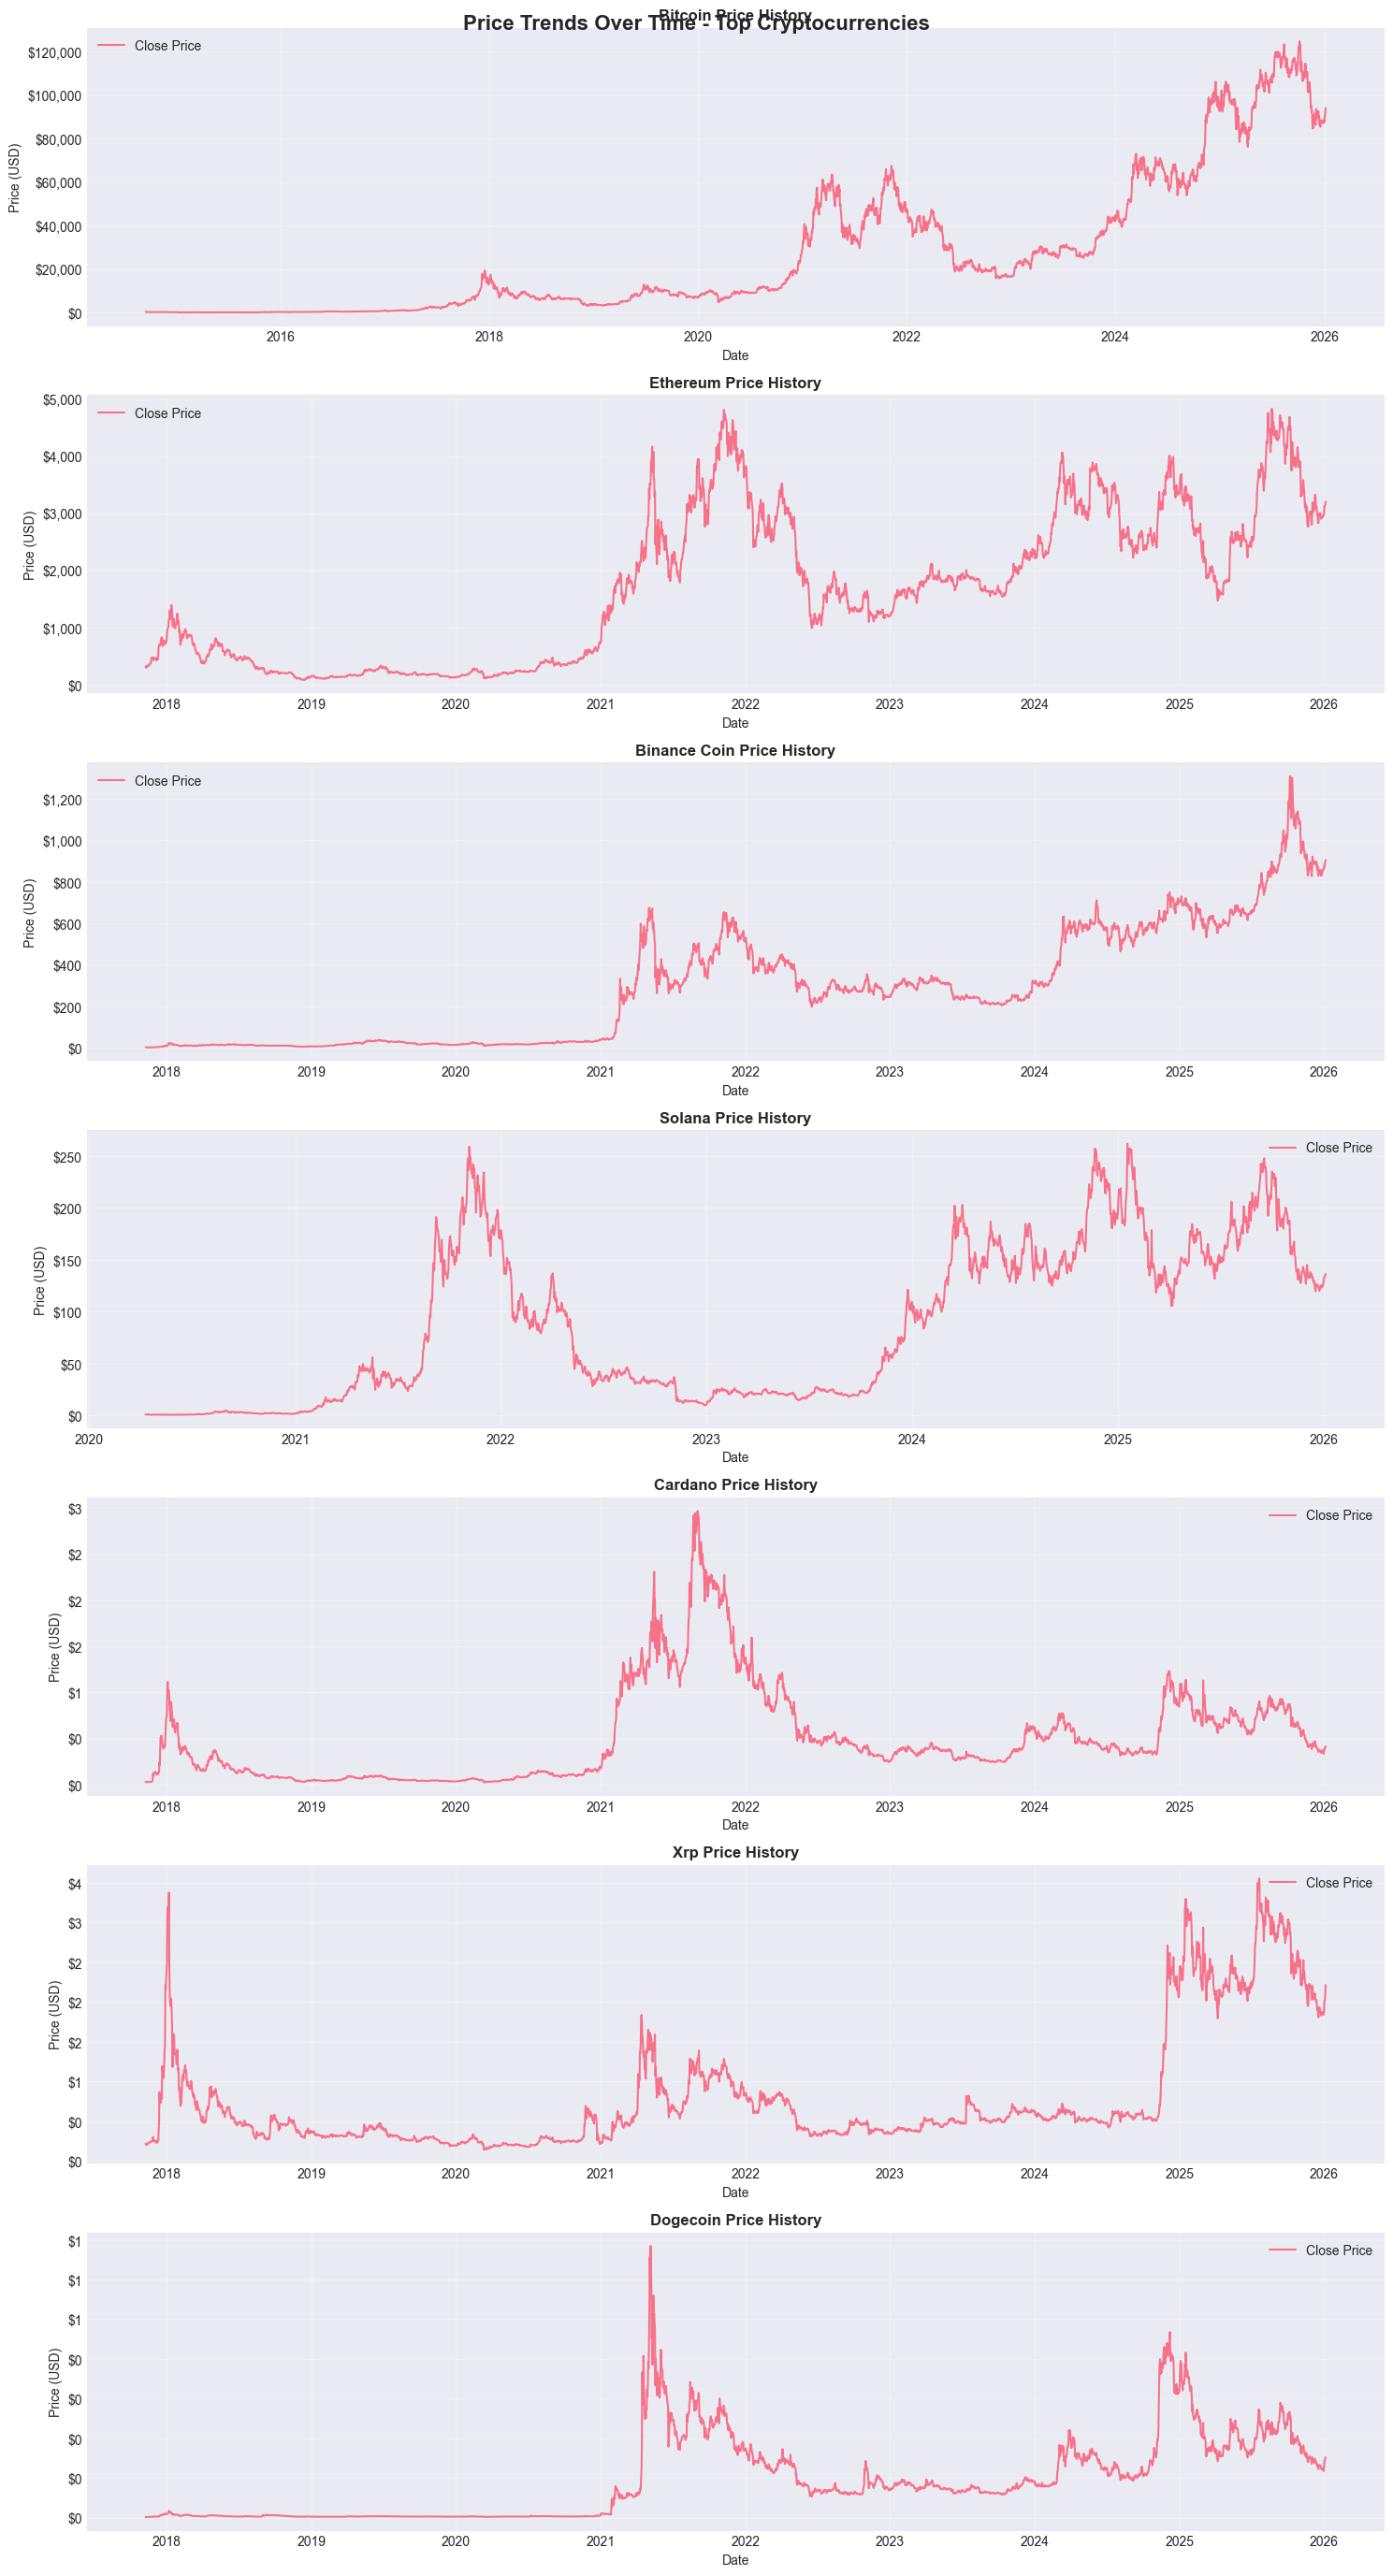

In [31]:
# Analyze price trends over time for top cryptocurrencies
top_cryptos = ['Bitcoin', 'Ethereum', 'Binance Coin', 'Solana', 'Cardano', 'Xrp', 'Dogecoin']

fig, axes = plt.subplots(len(top_cryptos), 1, figsize=(15, 4*len(top_cryptos)))
fig.suptitle('Price Trends Over Time - Top Cryptocurrencies', fontsize=16, fontweight='bold')

for idx, crypto in enumerate(top_cryptos):
    if crypto in crypto_data:
        df = crypto_data[crypto]
        axes[idx].plot(df['Date'], df['Close'], linewidth=1.5, label='Close Price')
        axes[idx].set_title(f'{crypto} Price History', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Date')
        axes[idx].set_ylabel('Price (USD)')
        axes[idx].grid(True, alpha=0.3)
        axes[idx].legend()
        
        # Format y-axis for better readability
        axes[idx].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()


## 5. Volatility Analysis


In [32]:
# Calculate volatility metrics for each cryptocurrency
volatility_metrics = []

for name, df in crypto_data.items():
    returns = df['Daily_Return'].dropna()
    if len(returns) > 0:
        volatility_metrics.append({
            'Cryptocurrency': name,
            'Mean Daily Return (%)': returns.mean() * 100,
            'Std Daily Return (%)': returns.std() * 100,
            'Annualized Volatility (%)': returns.std() * np.sqrt(365) * 100,
            'Min Daily Return (%)': returns.min() * 100,
            'Max Daily Return (%)': returns.max() * 100,
            'Sharpe Ratio (assuming 0% risk-free rate)': (returns.mean() / returns.std()) * np.sqrt(365) if returns.std() > 0 else 0
        })

volatility_df = pd.DataFrame(volatility_metrics)
volatility_df = volatility_df.sort_values('Annualized Volatility (%)', ascending=False)

print("Volatility Metrics by Cryptocurrency:")
print(volatility_df.to_string(index=False))


Volatility Metrics by Cryptocurrency:
   Cryptocurrency  Mean Daily Return (%)  Std Daily Return (%)  Annualized Volatility (%)  Min Daily Return (%)  Max Daily Return (%)  Sharpe Ratio (assuming 0% risk-free rate)
         Optimism                 143.62               5359.17                  102386.79                -29.53             200019.76                                       0.51
             Aave                   5.53                232.55                    4442.77                -33.83              10189.29                                       0.45
        The Graph                   5.84                 60.66                    1158.84                -96.90                933.37                                       1.84
         Dogecoin                   0.43                  9.28                     177.29                -40.26                355.55                                       0.88
           Render                   0.68                  8.72               

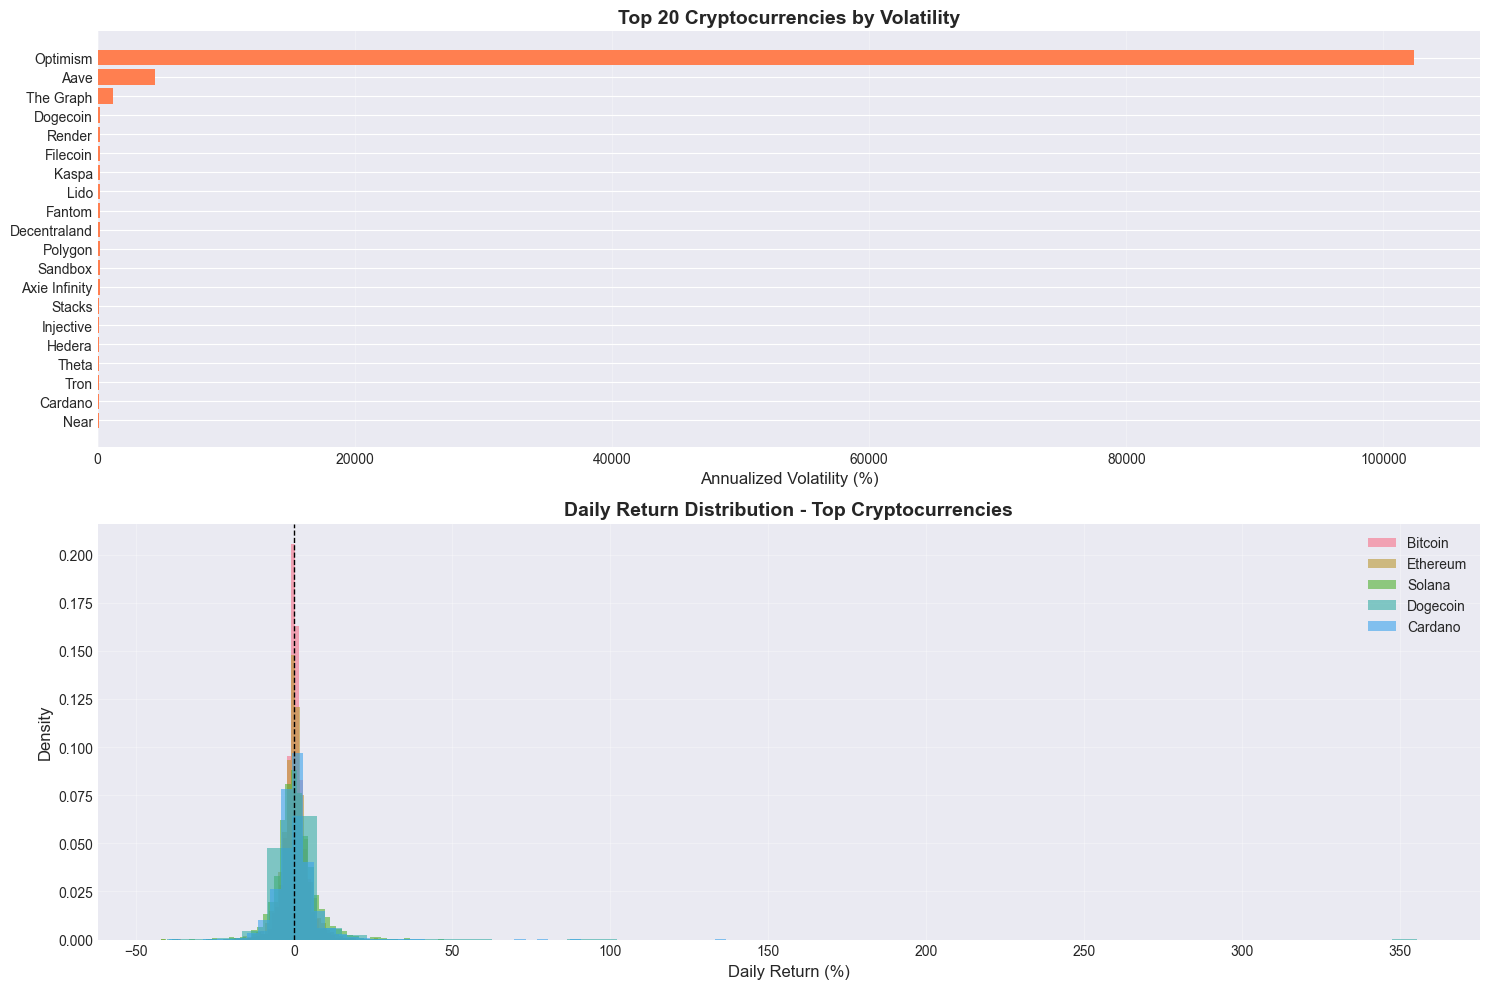

In [33]:
# Visualize volatility comparison
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Top 20 by volatility
top_vol = volatility_df.head(20)
axes[0].barh(top_vol['Cryptocurrency'], top_vol['Annualized Volatility (%)'], color='coral')
axes[0].set_xlabel('Annualized Volatility (%)', fontsize=12)
axes[0].set_title('Top 20 Cryptocurrencies by Volatility', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].invert_yaxis()

# Daily return distribution for top cryptocurrencies
top_cryptos_vol = ['Bitcoin', 'Ethereum', 'Solana', 'Dogecoin', 'Cardano']
for crypto in top_cryptos_vol:
    if crypto in crypto_data:
        returns = crypto_data[crypto]['Daily_Return'].dropna() * 100
        axes[1].hist(returns, bins=50, alpha=0.6, label=crypto, density=True)

axes[1].set_xlabel('Daily Return (%)', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].set_title('Daily Return Distribution - Top Cryptocurrencies', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].axvline(x=0, color='black', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()


## 6. Correlation Analysis


In [34]:
# Create a pivot table for close prices by date and cryptocurrency
# This will help us analyze correlations
price_pivot = all_data.pivot_table(
    index='Date', 
    columns='Cryptocurrency', 
    values='Close'
)

print(f"Price pivot table shape: {price_pivot.shape}")
print(f"Date range: {price_pivot.index.min()} to {price_pivot.index.max()}")
print(f"\nFirst few rows and columns:")
print(price_pivot.iloc[:5, :5])


Price pivot table shape: (4129, 49)
Date range: 2014-09-17 00:00:00 to 2026-01-05 00:00:00

First few rows and columns:
Cryptocurrency  Aave  Algorand  Aptos  Arbitrum  Avalanche
Date                                                      
2014-09-17       NaN       NaN    NaN       NaN        NaN
2014-09-18       NaN       NaN    NaN       NaN        NaN
2014-09-19       NaN       NaN    NaN       NaN        NaN
2014-09-20       NaN       NaN    NaN       NaN        NaN
2014-09-21       NaN       NaN    NaN       NaN        NaN


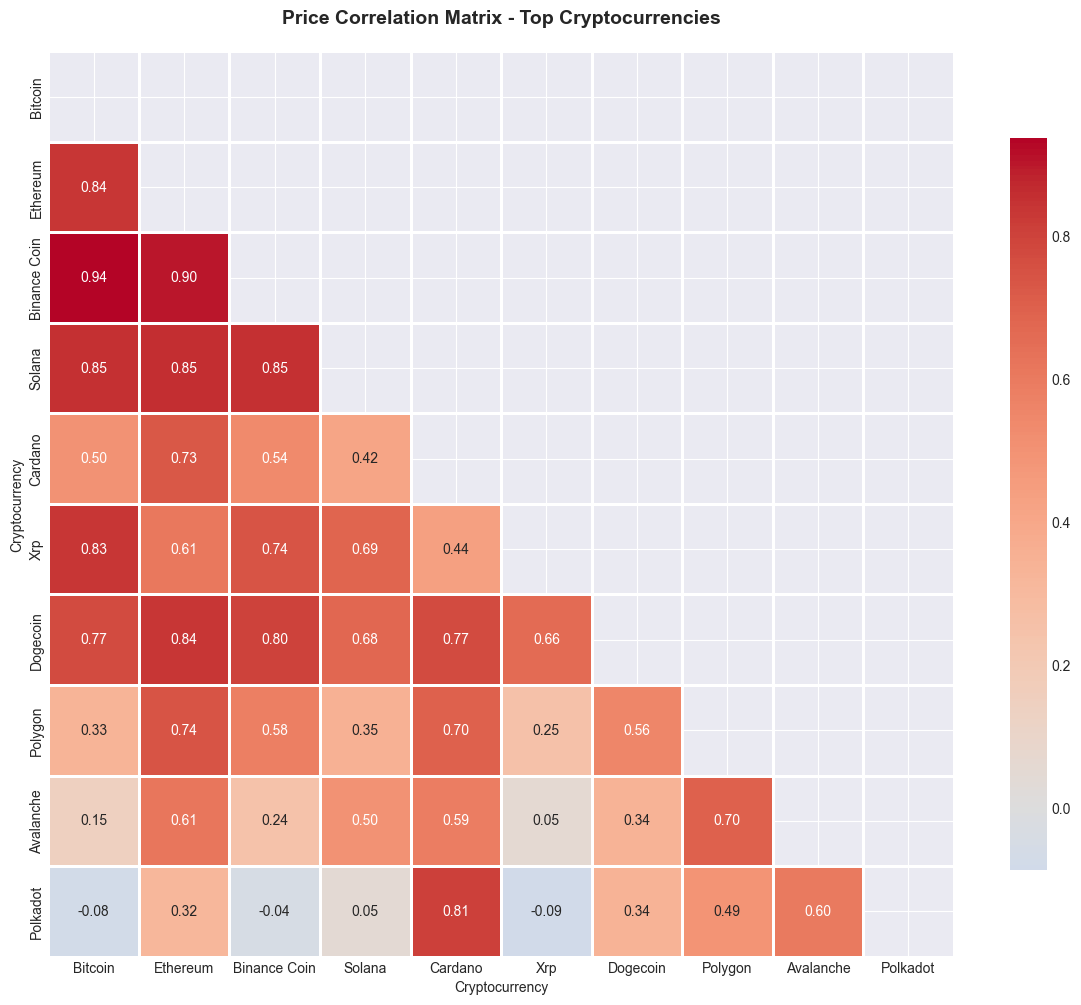


Correlation Summary:
Average correlation: 0.541
Max correlation: 0.938
Min correlation: -0.087


In [35]:
# Calculate correlation matrix for top cryptocurrencies
top_cryptos_corr = ['Bitcoin', 'Ethereum', 'Binance Coin', 'Solana', 'Cardano', 
                    'Xrp', 'Dogecoin', 'Polygon', 'Avalanche', 'Polkadot']

# Filter to only include cryptos that exist in our data
available_cryptos = [c for c in top_cryptos_corr if c in price_pivot.columns]
corr_matrix = price_pivot[available_cryptos].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, mask=mask)
plt.title('Price Correlation Matrix - Top Cryptocurrencies', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nCorrelation Summary:")
print(f"Average correlation: {corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)].mean():.3f}")
print(f"Max correlation: {corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)].max():.3f}")
print(f"Min correlation: {corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)].min():.3f}")


## 7. Volume Analysis


In [36]:
# Volume statistics by cryptocurrency
volume_stats = []

for name, df in crypto_data.items():
    volume = df['Volume'].dropna()
    if len(volume) > 0 and volume.sum() > 0:
        volume_stats.append({
            'Cryptocurrency': name,
            'Mean Daily Volume': volume.mean(),
            'Median Daily Volume': volume.median(),
            'Max Daily Volume': volume.max(),
            'Total Volume': volume.sum(),
            'Zero Volume Days': (volume == 0).sum()
        })

volume_df = pd.DataFrame(volume_stats)
volume_df = volume_df.sort_values('Mean Daily Volume', ascending=False)

print("Volume Statistics by Cryptocurrency:")
print(volume_df.head(20).to_string(index=False))


Volume Statistics by Cryptocurrency:
Cryptocurrency  Mean Daily Volume  Median Daily Volume  Max Daily Volume    Total Volume  Zero Volume Days
      Usd Coin     65274348463.30        3098920631.00    83252070566791 172781200382364                 0
        Tether     51574410278.29       43300222576.00      344398037459 153691742629300                 0
       Bitcoin     21643259805.88       17107279932.00      350967941479  89365019738462                 0
      Ethereum     14918371702.67       12096889013.50       97736621123  44456747673942                 0
           Xrp      2869571187.67        1591356838.00       51723383809   8551322139245                 0
        Solana      2276288524.39        1475878151.00       33172955667   4773377035651                 0
  Bitcoin Cash      1500167604.06         645969615.00       29574589033   4470499460097                 0
      Dogecoin      1270922212.70         391366099.50       69410680685   3787348193854                 0


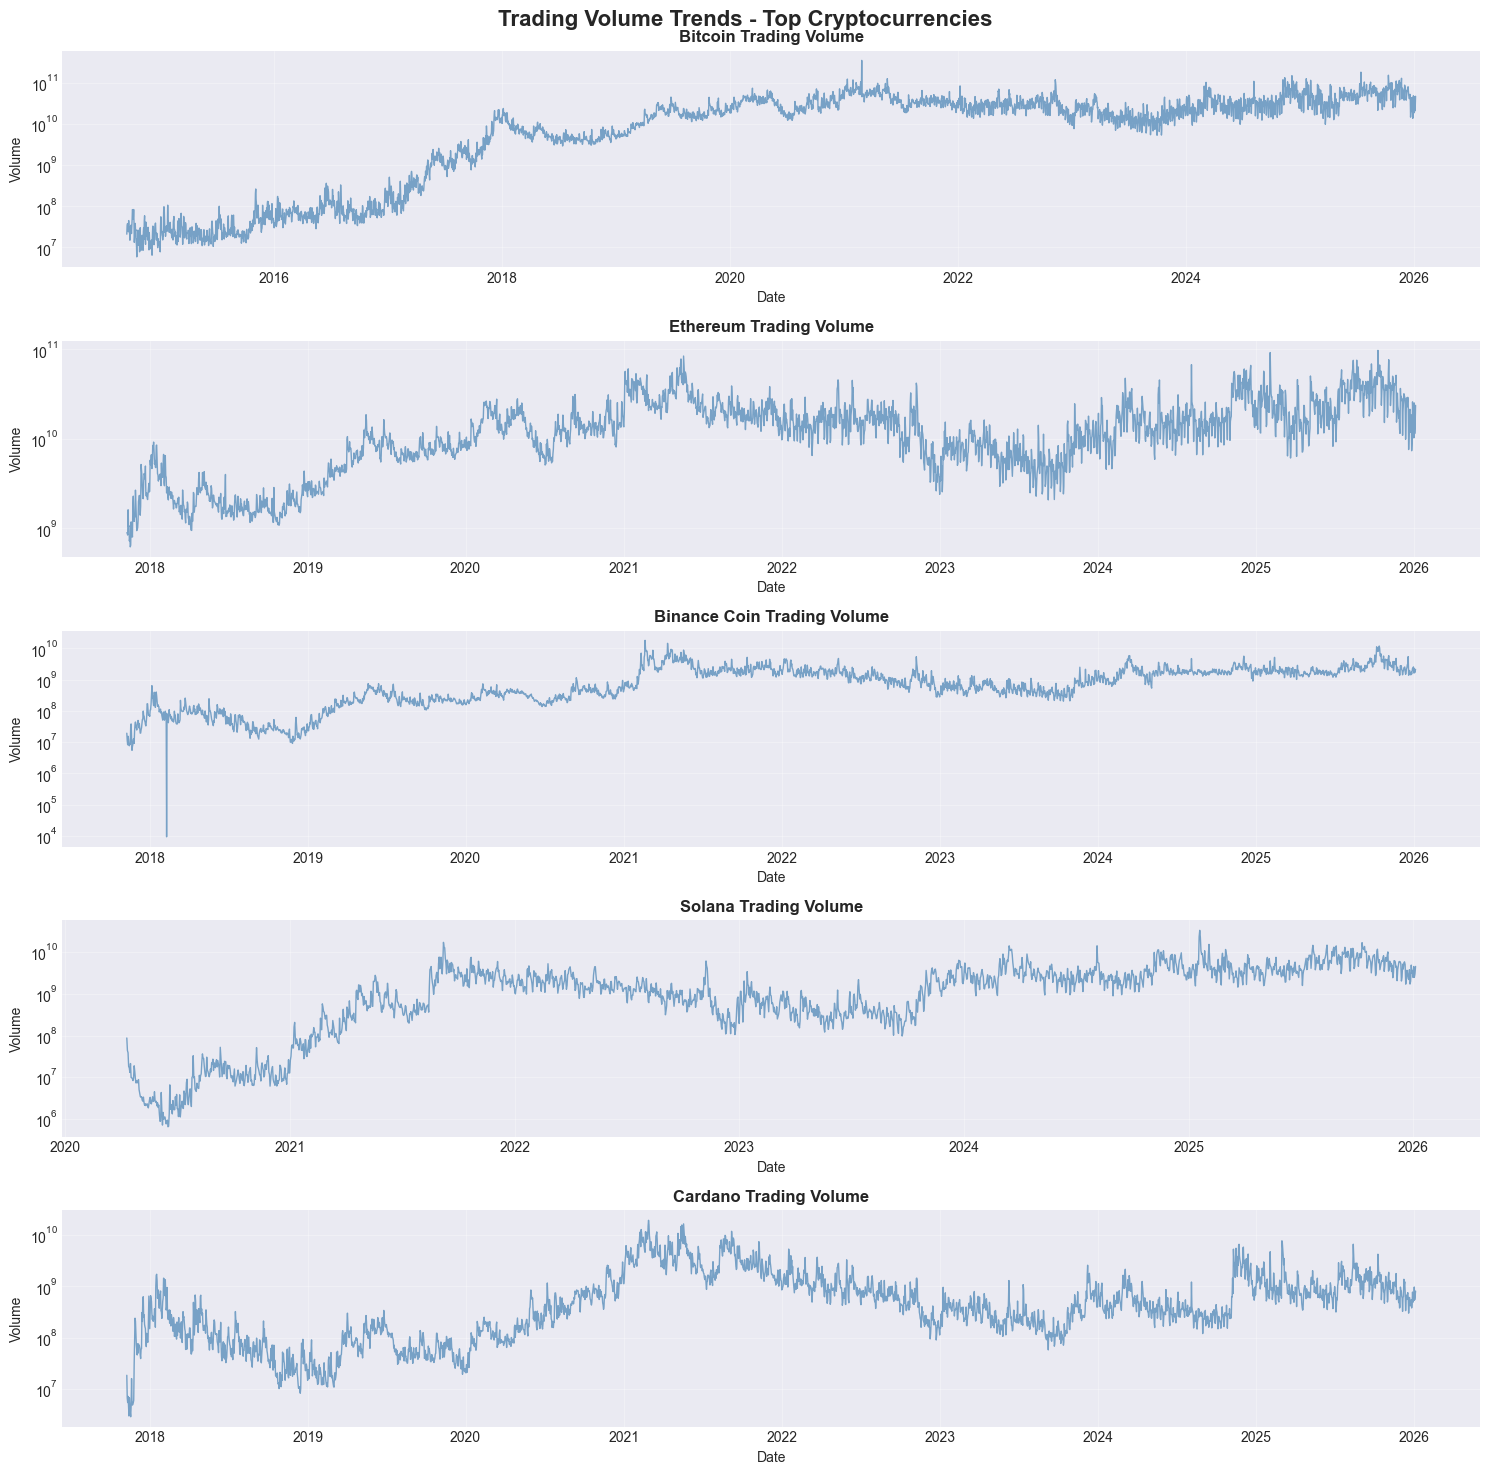

In [37]:
# Visualize volume trends for top cryptocurrencies
top_cryptos_vol = ['Bitcoin', 'Ethereum', 'Binance Coin', 'Solana', 'Cardano']

fig, axes = plt.subplots(len(top_cryptos_vol), 1, figsize=(15, 3*len(top_cryptos_vol)))
fig.suptitle('Trading Volume Trends - Top Cryptocurrencies', fontsize=16, fontweight='bold')

for idx, crypto in enumerate(top_cryptos_vol):
    if crypto in crypto_data:
        df = crypto_data[crypto]
        axes[idx].plot(df['Date'], df['Volume'], linewidth=1, alpha=0.7, color='steelblue')
        axes[idx].set_title(f'{crypto} Trading Volume', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Date')
        axes[idx].set_ylabel('Volume')
        axes[idx].grid(True, alpha=0.3)
        axes[idx].set_yscale('log')  # Log scale for better visualization

plt.tight_layout()
plt.show()


## 8. Price Distribution Analysis


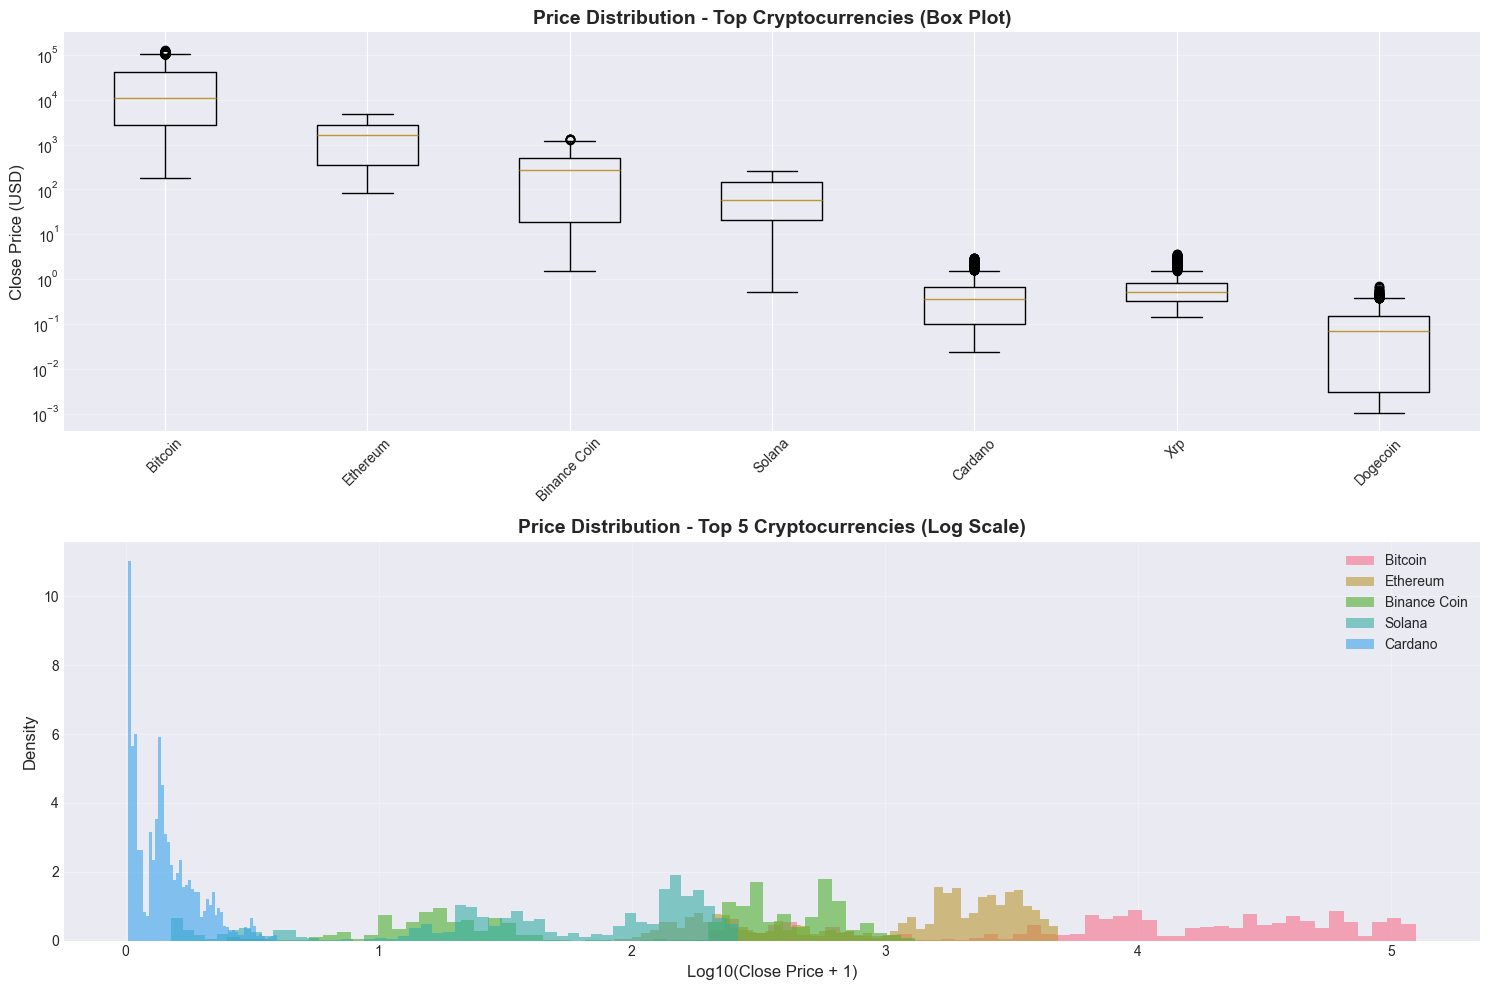

In [38]:
# Analyze price distributions
top_cryptos_dist = ['Bitcoin', 'Ethereum', 'Binance Coin', 'Solana', 'Cardano', 'Xrp', 'Dogecoin']

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Box plot of close prices
price_data = [crypto_data[c]['Close'].values for c in top_cryptos_dist if c in crypto_data]
labels = [c for c in top_cryptos_dist if c in crypto_data]

axes[0].boxplot(price_data, labels=labels, vert=True)
axes[0].set_ylabel('Close Price (USD)', fontsize=12)
axes[0].set_title('Price Distribution - Top Cryptocurrencies (Box Plot)', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_yscale('log')  # Log scale due to large price differences
axes[0].grid(True, alpha=0.3, axis='y')

# Histogram of close prices (log scale)
for crypto in top_cryptos_dist[:5]:  # Show top 5 for clarity
    if crypto in crypto_data:
        prices = crypto_data[crypto]['Close'].dropna()
        axes[1].hist(np.log10(prices + 1), bins=50, alpha=0.6, label=crypto, density=True)

axes[1].set_xlabel('Log10(Close Price + 1)', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].set_title('Price Distribution - Top 5 Cryptocurrencies (Log Scale)', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 9. Market Capitalization and Performance Metrics


In [39]:
# Calculate performance metrics
performance_metrics = []

for name, df in crypto_data.items():
    if len(df) > 0:
        initial_price = df['Close'].iloc[0]
        final_price = df['Close'].iloc[-1]
        max_price = df['Close'].max()
        min_price = df['Close'].min()
        
        total_return = ((final_price - initial_price) / initial_price) * 100 if initial_price > 0 else 0
        max_drawdown = ((max_price - min_price) / max_price) * 100 if max_price > 0 else 0
        
        # Calculate returns for different periods
        if len(df) >= 365:
            one_year_return = ((df['Close'].iloc[-1] - df['Close'].iloc[-365]) / df['Close'].iloc[-365]) * 100
        else:
            one_year_return = None
            
        performance_metrics.append({
            'Cryptocurrency': name,
            'Initial Price': initial_price,
            'Final Price': final_price,
            'Total Return (%)': total_return,
            'Max Price': max_price,
            'Min Price': min_price,
            'Max Drawdown (%)': max_drawdown,
            '1-Year Return (%)': one_year_return,
            'Price Range': max_price - min_price
        })

performance_df = pd.DataFrame(performance_metrics)
performance_df = performance_df.sort_values('Total Return (%)', ascending=False)

print("Performance Metrics by Cryptocurrency:")
print(performance_df.head(20).to_string(index=False))


Performance Metrics by Cryptocurrency:
Cryptocurrency  Initial Price  Final Price  Total Return (%)  Max Price  Min Price  Max Drawdown (%)  1-Year Return (%)  Price Range
  Binance Coin           1.99       905.54          45387.16    1310.21       1.51             99.88              24.15      1308.70
      Optimism           0.00         0.32          35594.53       4.70       0.00             99.99             -84.59         4.70
          Aave           0.52       171.79          33155.72     632.27       0.52             99.92             -49.60       631.75
         Kaspa           0.00         0.05          27692.38       0.21       0.00             99.91             -58.55         0.21
       Bitcoin         457.33     94033.12          20461.15  124752.53     178.10             99.86              -7.88    124574.43
        Solana           0.95       136.23          14224.18     261.87       0.52             99.80             -37.72       261.35
        Render           0.06 

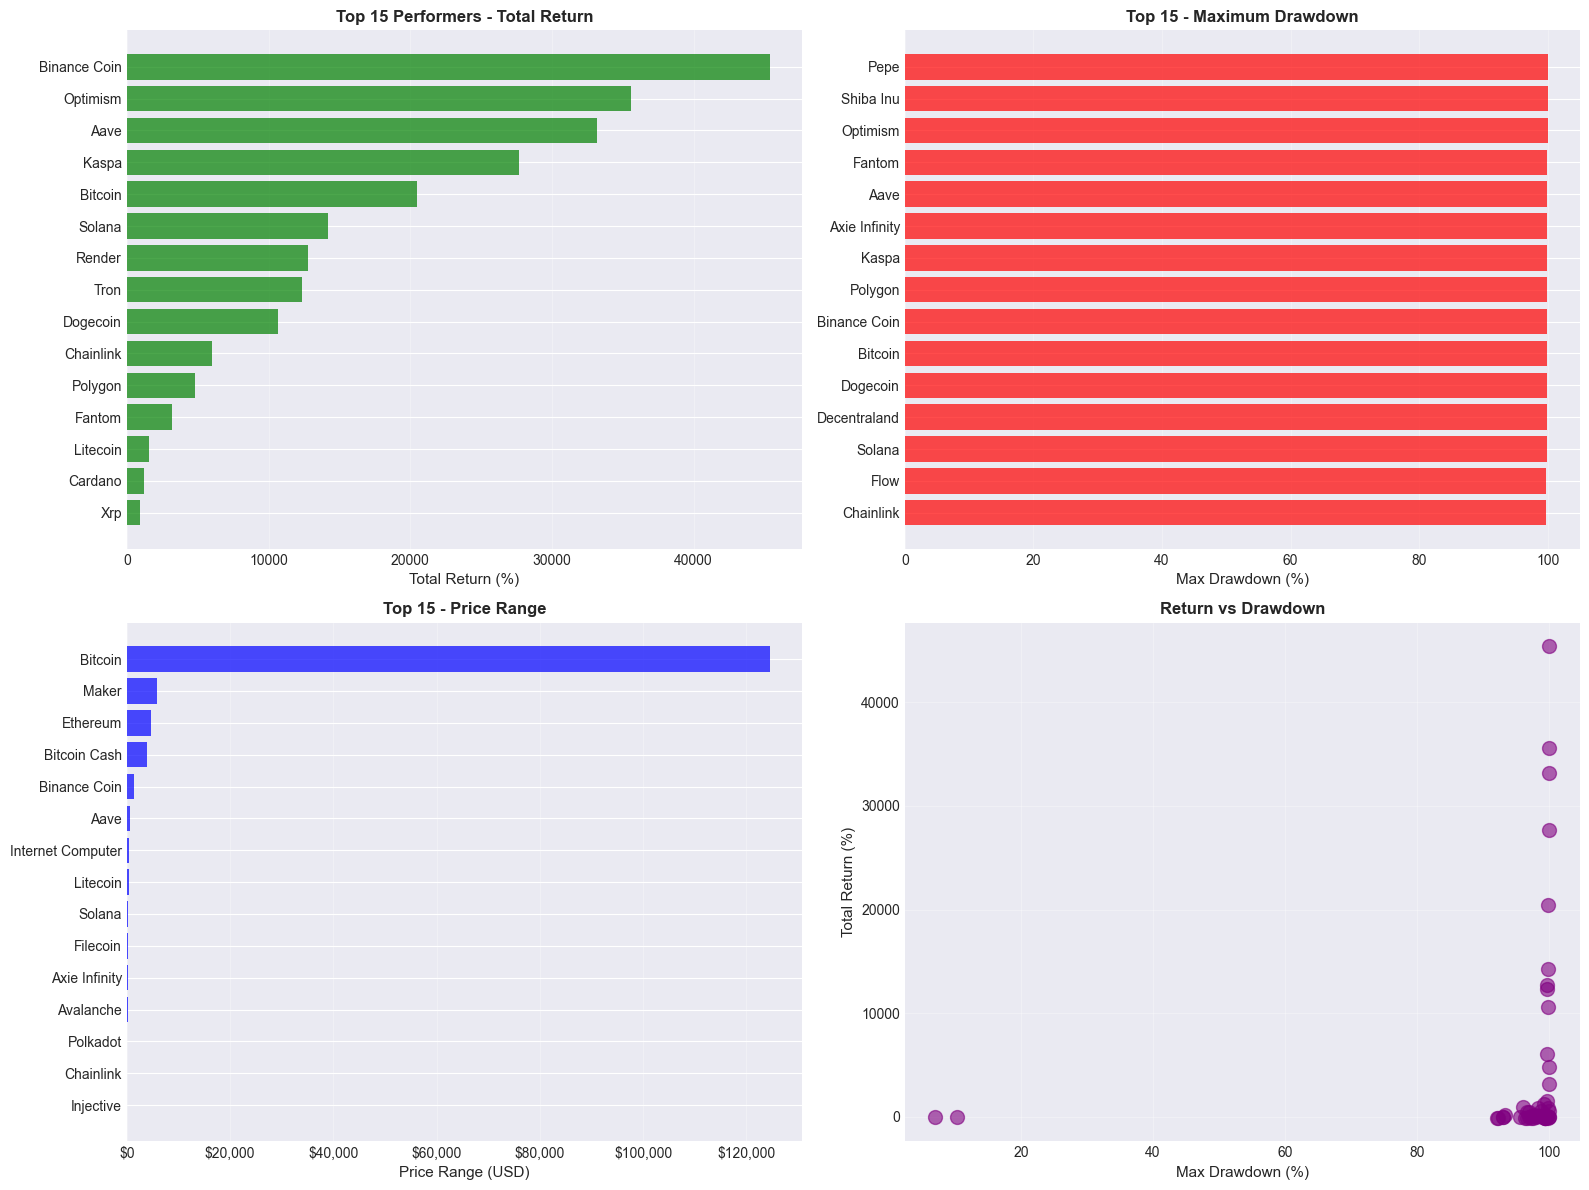

In [40]:
# Visualize performance metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Total Return
top_performers = performance_df.nlargest(15, 'Total Return (%)')
axes[0, 0].barh(top_performers['Cryptocurrency'], top_performers['Total Return (%)'], color='green', alpha=0.7)
axes[0, 0].set_xlabel('Total Return (%)', fontsize=11)
axes[0, 0].set_title('Top 15 Performers - Total Return', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='x')
axes[0, 0].invert_yaxis()

# Max Drawdown
top_drawdown = performance_df.nlargest(15, 'Max Drawdown (%)')
axes[0, 1].barh(top_drawdown['Cryptocurrency'], top_drawdown['Max Drawdown (%)'], color='red', alpha=0.7)
axes[0, 1].set_xlabel('Max Drawdown (%)', fontsize=11)
axes[0, 1].set_title('Top 15 - Maximum Drawdown', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='x')
axes[0, 1].invert_yaxis()

# Price Range
top_range = performance_df.nlargest(15, 'Price Range')
axes[1, 0].barh(top_range['Cryptocurrency'], top_range['Price Range'], color='blue', alpha=0.7)
axes[1, 0].set_xlabel('Price Range (USD)', fontsize=11)
axes[1, 0].set_title('Top 15 - Price Range', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='x')
axes[1, 0].invert_yaxis()
axes[1, 0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Scatter: Return vs Drawdown
axes[1, 1].scatter(performance_df['Max Drawdown (%)'], performance_df['Total Return (%)'], 
                   alpha=0.6, s=100, c='purple')
axes[1, 1].set_xlabel('Max Drawdown (%)', fontsize=11)
axes[1, 1].set_ylabel('Total Return (%)', fontsize=11)
axes[1, 1].set_title('Return vs Drawdown', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 10. Time-Based Patterns


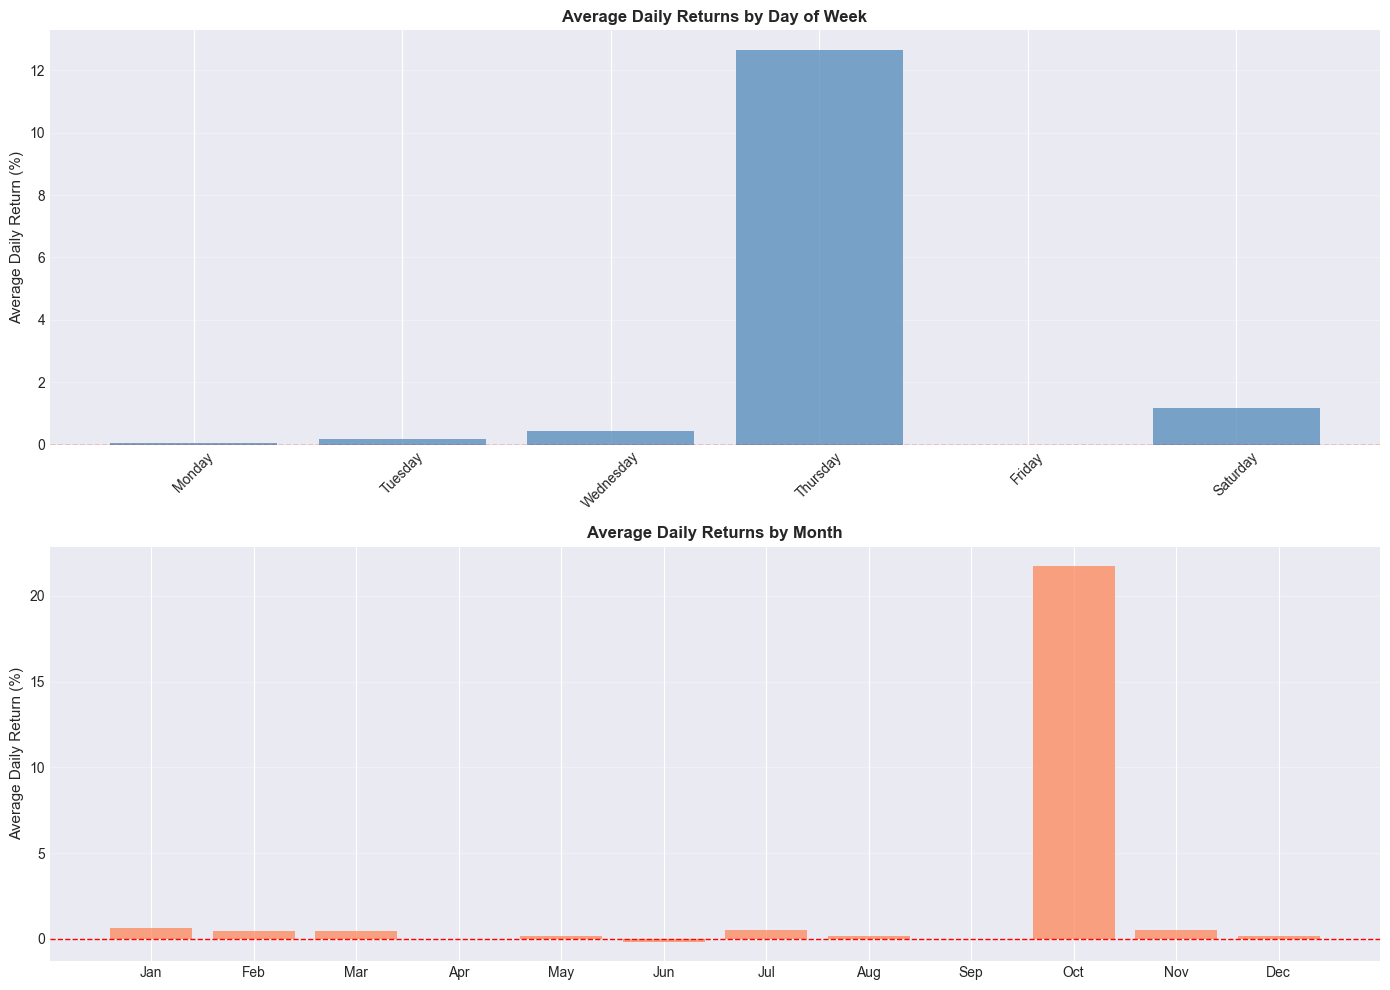


Average Daily Returns by Day of Week:
DayName
Monday       0.05
Tuesday      0.17
Wednesday    0.46
Thursday    12.64
Friday        inf
Saturday     1.18
Sunday        inf
Name: Daily_Return, dtype: float64

Average Daily Returns by Month:
Month
1     0.61
2     0.47
3     0.47
4      inf
5     0.18
6    -0.21
7     0.49
8     0.15
9     0.01
10   21.76
11    0.53
12    0.18
Name: Daily_Return, dtype: float64


In [41]:
# Analyze patterns by day of week, month, year
all_data['Year'] = all_data['Date'].dt.year
all_data['Month'] = all_data['Date'].dt.month
all_data['DayOfWeek'] = all_data['Date'].dt.dayofweek
all_data['DayName'] = all_data['Date'].dt.day_name()

# Average returns by day of week
daily_returns_by_dow = all_data.groupby('DayName')['Daily_Return'].mean() * 100
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_returns_by_dow = daily_returns_by_dow.reindex([d for d in day_order if d in daily_returns_by_dow.index])

# Average returns by month
monthly_returns = all_data.groupby('Month')['Daily_Return'].mean() * 100

# Visualize
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Day of week analysis
axes[0].bar(daily_returns_by_dow.index, daily_returns_by_dow.values, color='steelblue', alpha=0.7)
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[0].set_ylabel('Average Daily Return (%)', fontsize=11)
axes[0].set_title('Average Daily Returns by Day of Week', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].tick_params(axis='x', rotation=45)

# Monthly analysis
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[1].bar(month_names, monthly_returns.values, color='coral', alpha=0.7)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[1].set_ylabel('Average Daily Return (%)', fontsize=11)
axes[1].set_title('Average Daily Returns by Month', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nAverage Daily Returns by Day of Week:")
print(daily_returns_by_dow)
print("\nAverage Daily Returns by Month:")
print(monthly_returns)


## 11. Summary and Key Insights


In [42]:
# Generate summary statistics
print("="*80)
print("EXPLORATORY DATA ANALYSIS SUMMARY")
print("="*80)

print(f"\n1. DATASET OVERVIEW:")
print(f"   - Total Cryptocurrencies: {len(crypto_data)}")
print(f"   - Total Records: {len(all_data):,}")
print(f"   - Date Range: {all_data['Date'].min().date()} to {all_data['Date'].max().date()}")
print(f"   - Missing Values: {all_data.isnull().sum().sum():,} ({(all_data.isnull().sum().sum() / len(all_data) * 100):.2f}%)")

print(f"\n2. PRICE STATISTICS:")
print(f"   - Average Close Price: ${all_data['Close'].mean():,.2f}")
print(f"   - Median Close Price: ${all_data['Close'].median():,.2f}")
print(f"   - Price Range: ${all_data['Close'].min():,.2f} - ${all_data['Close'].max():,.2f}")

print(f"\n3. VOLATILITY:")
avg_volatility = volatility_df['Annualized Volatility (%)'].mean()
print(f"   - Average Annualized Volatility: {avg_volatility:.2f}%")
print(f"   - Most Volatile: {volatility_df.iloc[0]['Cryptocurrency']} ({volatility_df.iloc[0]['Annualized Volatility (%)']:.2f}%)")
print(f"   - Least Volatile: {volatility_df.iloc[-1]['Cryptocurrency']} ({volatility_df.iloc[-1]['Annualized Volatility (%)']:.2f}%)")

print(f"\n4. PERFORMANCE:")
print(f"   - Best Performer: {performance_df.iloc[0]['Cryptocurrency']} ({performance_df.iloc[0]['Total Return (%)']:.2f}% total return)")
print(f"   - Worst Performer: {performance_df.iloc[-1]['Cryptocurrency']} ({performance_df.iloc[-1]['Total Return (%)']:.2f}% total return)")

print(f"\n5. VOLUME:")
print(f"   - Average Daily Volume: {all_data['Volume'].mean():,.0f}")
print(f"   - Total Volume: {all_data['Volume'].sum():,.0f}")
print(f"   - Highest Volume Crypto: {volume_df.iloc[0]['Cryptocurrency']}")

print(f"\n6. CORRELATION:")
if len(available_cryptos) > 1:
    avg_corr = corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)].mean()
    print(f"   - Average Correlation (Top Cryptos): {avg_corr:.3f}")
    print(f"   - Most Correlated Pair: Check correlation matrix above")

print("\n" + "="*80)
print("EDA Analysis Complete!")
print("="*80)


EXPLORATORY DATA ANALYSIS SUMMARY

1. DATASET OVERVIEW:
   - Total Cryptocurrencies: 49
   - Total Records: 112,006
   - Date Range: 2014-09-17 to 2026-01-05
   - Missing Values: 3,127 (2.79%)

2. PRICE STATISTICS:
   - Average Close Price: $1,101.93
   - Median Close Price: $1.62
   - Price Range: $0.00 - $124,752.53

3. VOLATILITY:
   - Average Annualized Volatility: 2407.77%
   - Most Volatile: Optimism (102386.79%)
   - Least Volatile: Pepe (nan%)

4. PERFORMANCE:
   - Best Performer: Binance Coin (45387.16% total return)
   - Worst Performer: Internet Computer (-99.20% total return)

5. VOLUME:
   - Average Daily Volume: 4,626,395,214
   - Total Volume: 518,184,022,388,602
   - Highest Volume Crypto: Usd Coin

6. CORRELATION:
   - Average Correlation (Top Cryptos): 0.541
   - Most Correlated Pair: Check correlation matrix above

EDA Analysis Complete!


## 12. Additional Analysis: Price vs Volume Relationship


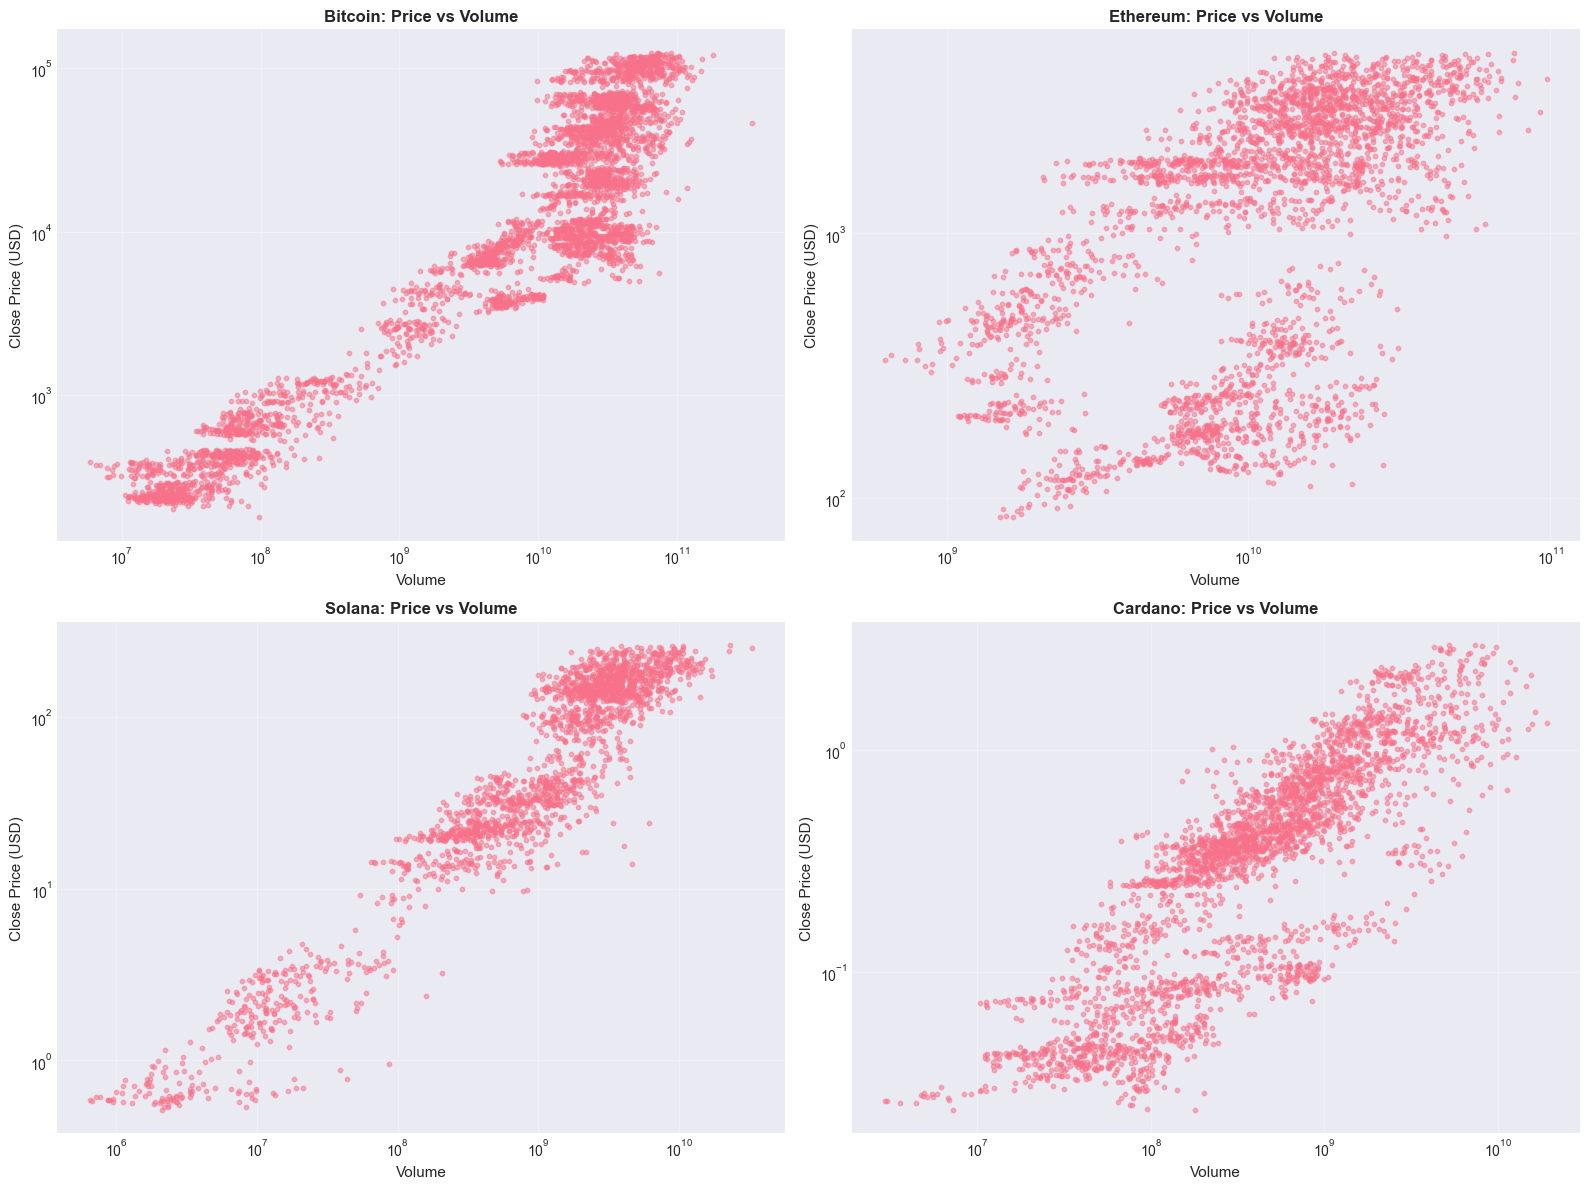

Price-Volume Correlation by Cryptocurrency:
Cryptocurrency  Price-Volume Correlation
        Fantom                      0.82
           Sui                      0.80
       Vechain                      0.80
         Theta                      0.79
        Render                      0.77
        Solana                      0.74
      Polkadot                      0.72
        Cosmos                      0.72
      Filecoin                      0.72
       Bitcoin                      0.71
          Aave                      0.69
          Near                      0.69
     Injective                      0.69
       Polygon                      0.68
       Toncoin                      0.68
  Binance Coin                      0.68
     Avalanche                      0.68
       Cardano                      0.67
       Sandbox                      0.66
          Pepe                      0.66


In [43]:
# Analyze relationship between price and volume
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

top_cryptos_pv = ['Bitcoin', 'Ethereum', 'Solana', 'Cardano']

for idx, crypto in enumerate(top_cryptos_pv):
    if crypto in crypto_data:
        df = crypto_data[crypto].dropna(subset=['Close', 'Volume'])
        if len(df) > 0:
            row = idx // 2
            col = idx % 2
            
            # Scatter plot: Price vs Volume
            axes[row, col].scatter(df['Volume'], df['Close'], alpha=0.5, s=10)
            axes[row, col].set_xlabel('Volume', fontsize=11)
            axes[row, col].set_ylabel('Close Price (USD)', fontsize=11)
            axes[row, col].set_title(f'{crypto}: Price vs Volume', fontsize=12, fontweight='bold')
            axes[row, col].set_xscale('log')
            axes[row, col].set_yscale('log')
            axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate correlation between price and volume
print("Price-Volume Correlation by Cryptocurrency:")
price_volume_corr = []
for name, df in crypto_data.items():
    df_clean = df.dropna(subset=['Close', 'Volume'])
    if len(df_clean) > 100:  # Only for cryptos with sufficient data
        corr = df_clean['Close'].corr(df_clean['Volume'])
        price_volume_corr.append({
            'Cryptocurrency': name,
            'Price-Volume Correlation': corr
        })

pv_corr_df = pd.DataFrame(price_volume_corr).sort_values('Price-Volume Correlation', ascending=False)
print(pv_corr_df.head(20).to_string(index=False))


## 13. Data Export for Further Analysis


In [44]:
# Optionally save processed data and summary statistics
# Uncomment the following lines to save the data

# Save combined dataset
# all_data.to_csv('../processed_data/combined_crypto_data.csv', index=False)
# print("Combined dataset saved!")

# Save summary statistics
# summary_stats = {
#     'quality_report': quality_df,
#     'volatility_metrics': volatility_df,
#     'volume_stats': volume_df,
#     'performance_metrics': performance_df
# }
# 
# with pd.ExcelWriter('../processed_data/eda_summary_statistics.xlsx') as writer:
#     quality_df.to_excel(writer, sheet_name='Quality Report', index=False)
#     volatility_df.to_excel(writer, sheet_name='Volatility Metrics', index=False)
#     volume_df.to_excel(writer, sheet_name='Volume Stats', index=False)
#     performance_df.to_excel(writer, sheet_name='Performance Metrics', index=False)
# 
# print("Summary statistics saved!")

print("Data export section ready. Uncomment the code above to save processed data.")


Data export section ready. Uncomment the code above to save processed data.
